In [71]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
%matplotlib inline

fname = "train.csv"

In [2]:
dia = pds.read_csv(fname)
dia.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
(dia.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
len(dia.columns)

21

In [5]:
# remove column id as we have index already

#dia = dia.drop(columns = "id")

# rename some columns
names = {"blue" : "bluetooth", "fc" : "cam_front_mp", "four_g" : "4G", "pc" : "back_cam_mp", "three_g" : "3G"}

dia.rename(columns = names, inplace = True)
dia.head()

,battery_power,bluetooth,clock_speed,dual_sim,cam_front_mp,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,3G,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<AxesSubplot:xlabel='X', ylabel='Y'>

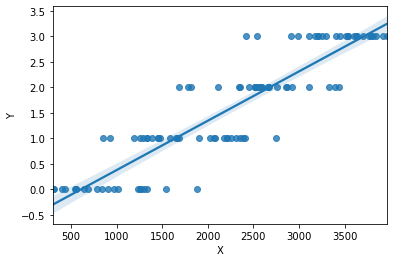

In [6]:
reg_data = dia.ram
Y_data = dia.price_range
lin_reg_data = pds.DataFrame(list(zip(reg_data, Y_data)), columns= ["X", "Y"])
lin_reg_data = lin_reg_data.sample(100, random_state=1)
lin_reg_data
#lin_reg_data2 = pds.DataFrame({"X" : reg_data, "Y" : Y_data})#, columns= ["X", "Y"])
sns.regplot(x= "X", y = "Y", data=lin_reg_data)

# I want to learn feature selection

## Starting with Univariate Selection

### I will be using scikit-learn module with SelectKBest class from feature selection
### chi-squared statistical test would be used as the score function with the selectKbest class

In [7]:
from sklearn.feature_selection import SelectKBest as skb
from sklearn.feature_selection import chi2

# differentiate target feature from other features
X_data = dia.drop(columns = "price_range")
Y_data = dia.price_range

In [8]:
features = skb(score_func=chi2, k=10)
datafit = features.fit(X_data, Y_data)
featuresScores = pds.DataFrame(list(zip(X_data.columns, datafit.scores_)),columns = ["Phone_specs", "Scores"])
featuresScores_import = featuresScores.nlargest(10, "Scores")
feat_list = (featuresScores_import.Phone_specs).index
#feat_list = np.sort(np.array(feat_list))

req_data1 = dia.iloc[:,feat_list]
req_data1
###Another method
#datascores = pds.DataFrame(datafit.scores_)
#datacolumns = pds.DataFrame(X_data.columns)
#featuresScores = pds.concat([datascores, datacolumns], axis=1)
#featuresScores.columns = ["Phone_specs", "Scores"]
#featuresScores

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,cam_front_mp,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


# Using Feature importance

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,back_cam_mp,talk_time,sc_h,m_dep
0,2549,842,756,20,188,7,2,19,9,0.6
1,2631,1021,1988,905,136,53,6,7,17,0.7
2,2603,563,1716,1263,145,41,6,9,11,0.9
3,2769,615,1786,1216,131,10,9,11,16,0.8
4,1411,1821,1212,1208,141,44,14,15,8,0.6
...,...,...,...,...,...,...,...,...,...,...
1995,668,794,1890,1222,106,2,14,19,13,0.8
1996,2032,1965,1965,915,187,39,3,16,11,0.2
1997,3057,1911,1632,868,108,36,3,5,9,0.7
1998,869,1512,670,336,145,46,5,19,18,0.1


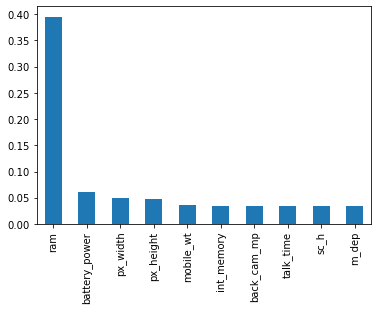

In [9]:
from sklearn.ensemble import ExtraTreesClassifier as etc

model2 = etc()
model2.fit(X_data, Y_data)

m_plt = pds.Series(model2.feature_importances_, index= X_data.columns)
m_plt.nlargest(10).plot(kind= "bar")
plt.show
req_data2 = dia[m_plt.nlargest(10).index]

req_data2

#a = (np.sort(model2.feature_importances_))[(len(model2.feature_importances_)-10):len(model2.feature_importances_)]

In [10]:
req_data1.columns.sort_values()

Index(['battery_power', 'cam_front_mp', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')

In [11]:
req_data2.columns.sort_values()

Index(['back_cam_mp', 'battery_power', 'int_memory', 'm_dep', 'mobile_wt',
       'px_height', 'px_width', 'ram', 'sc_h', 'talk_time'],
      dtype='object')

In [12]:
(req_data1.columns).sort_values() == req_data2.columns.sort_values()

array([False, False,  True, False, False, False, False, False, False,
        True])

# Let's try correlation matrix with Heatmap

,ram,battery_power,px_width,px_height
0,2549,842,756,20
1,2631,1021,1988,905
2,2603,563,1716,1263
3,2769,615,1786,1216
4,1411,1821,1212,1208
5,1067,1859,1654,1004
6,3220,1821,1018,381
7,700,1954,1149,512
8,1099,1445,836,386
9,513,509,1224,1137


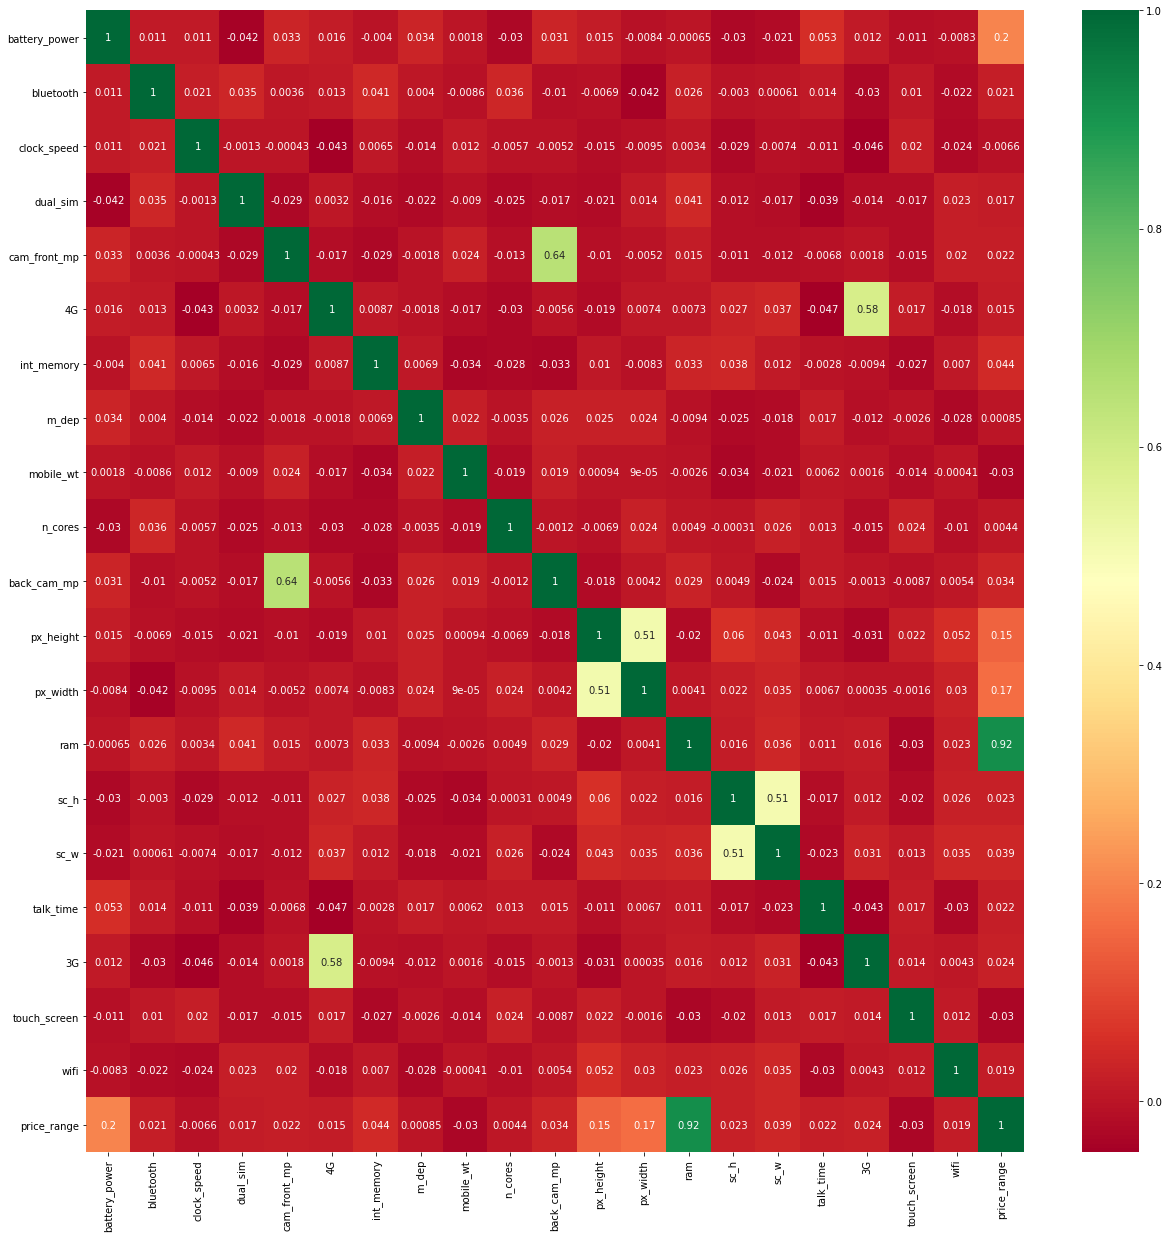

In [31]:
datacorr = dia.corr()
top_datacorr = datacorr.index
plt.figure(figsize=(len(dia.columns),len(dia.columns)))
re_datacorr = dia[top_datacorr].corr()
dia_plot = sns.heatmap(re_datacorr, annot=True, cmap="RdYlGn")

final_data = dia[((re_datacorr.price_range.nlargest(10))[1:][(re_datacorr.price_range.nlargest(10))[1:].values > 0.1]).index].head(10)
final_data

In [14]:
final_data.describe()

,ram,battery_power,px_width,px_height
count,10.000000,10.000000,10.000000,10.000000
mean,1856.200000,1245.000000,1333.900000,803.200000
std,992.557169,596.241375,424.721726,442.002715
min,513.000000,509.000000,756.000000,20.000000
25%,1075.000000,671.750000,1050.750000,417.500000
50%,1980.000000,1233.000000,1218.000000,954.500000
75%,2624.000000,1821.000000,1700.500000,1190.250000
max,3220.000000,1954.000000,1988.000000,1263.000000


In [33]:
final_data = pds.concat([final_data, dia.price_range.head(10)],axis = 1)
final_data

,ram,battery_power,px_width,px_height,price_range
0,2549,842,756,20,1
1,2631,1021,1988,905,2
2,2603,563,1716,1263,2
3,2769,615,1786,1216,2
4,1411,1821,1212,1208,1
5,1067,1859,1654,1004,1
6,3220,1821,1018,381,3
7,700,1954,1149,512,0
8,1099,1445,836,386,0
9,513,509,1224,1137,0


C:\Users\Abdulbaasit\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abdulbaasit\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abdulbaasit\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abdulbaasit\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


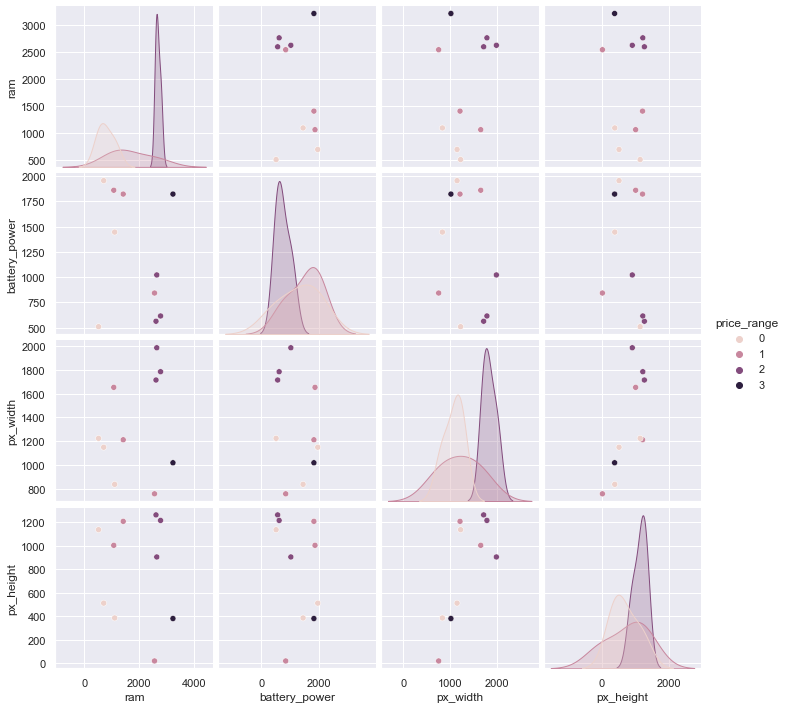

In [76]:
sns.pairplot(final_data, hue = final_data.columns[-1])